# Smoke detection project

It is estimated that if every home had working smoke alarms, U.S. residential fire deaths could drop by 36%, with nearly 1100 lives saved per year. The number of false fire alarms is increasing continuously, which is a severe issue for firefighters.

## Data description

All credit regarding the data and relevant information about the problem goes to [Stefan Blattmann](https://github.com/Blatts01) through his [original project](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

Data was colected through a series of sensors, across different controled scenarios:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity
* etc.

The following metrics correspond to one or more columns on the data set:

* UTC: Timestamp UTC seconds
* Air Temperature (Celsius)
* Air Humidity
* TVOC: Total Volatile Organic Compounds; measured in parts per billion [(Source)](https://en.wikipedia.org/wiki/Volatile_organic_compound)
* eCO2: CO2 equivalent concentration; calculated from different values like TVCO
* Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.) [(Source)](https://en.wikipedia.org/wiki/Hydrogen)
* Raw Ethanol: raw ethanol gas [(Source)](https://en.wikipedia.org/wiki/Ethanol)
* Air Pressure
* PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* CNT: Sample counter
* Fire Alarm: ground truth is "1" if a fire is there

Source: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6

## Import data

In [40]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('smoke_detection_iot.csv', index_col=0)

# Check number of rows and columns and compare to dataset from terminal
print(df.shape)

(62630, 15)


In [41]:
# Check col names
print(df.columns)

# Rename columns
df.rename(columns = {'Temperature[C]': 'temperature_C',
                     'Humidity[%]': 'humidity', 
                     'TVOC[ppb]': 'TVOC_ppb',
                     'eCO2[ppm]': 'CO2_ppm', 
                     'Raw H2': 'raw_H2', 
                     'Raw Ethanol': 'raw_ethanol', 
                     'Pressure[hPa]': 'pressure_hPA', 
                     'Fire Alarm': 'fire'},
          inplace = True)

print(df.columns)

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')
Index(['UTC', 'temperature_C', 'humidity', 'TVOC_ppb', 'CO2_ppm', 'raw_H2',
       'raw_ethanol', 'pressure_hPA', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'fire'],
      dtype='object')


In [42]:
df.dtypes

UTC                int64
temperature_C    float64
humidity         float64
TVOC_ppb           int64
CO2_ppm            int64
raw_H2             int64
raw_ethanol        int64
pressure_hPA     float64
PM1.0            float64
PM2.5            float64
NC0.5            float64
NC1.0            float64
NC2.5            float64
CNT                int64
fire               int64
dtype: object

In [43]:
print(df.describe())

                UTC  temperature_C      humidity      TVOC_ppb       CO2_ppm  \
count  6.263000e+04   62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09      15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05      14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09     -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09      10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09      20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09      25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09      59.930000     75.200000  60000.000000  60000.000000   

             raw_H2   raw_ethanol  pressure_hPA         PM1.0         PM2.5  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912    938.627649    100.594309    184.467770   
std      272.464305    609.513156      1.3

In [44]:
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [45]:
df.tail()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [46]:
# Null x non-null
df.isnull().sum()
# There is no missing data

UTC              0
temperature_C    0
humidity         0
TVOC_ppb         0
CO2_ppm          0
raw_H2           0
raw_ethanol      0
pressure_hPA     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
fire             0
dtype: int64

In [47]:
df['fire'].value_counts()

1    44757
0    17873
Name: fire, dtype: int64

## Visualizations

In [48]:
# Correlations between variables

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Pearson r correlation: the most widely used correlation statistic to measure the degree of the 
# relationship between linearly related variables.

# Spearman's rank corelation is a nonparametric measure of rank correlation (statistical dependence between the
# rankings of two variables). It assesses how well the relationship between two variables can be described using
# a monotonic function.

### Correlation between variables

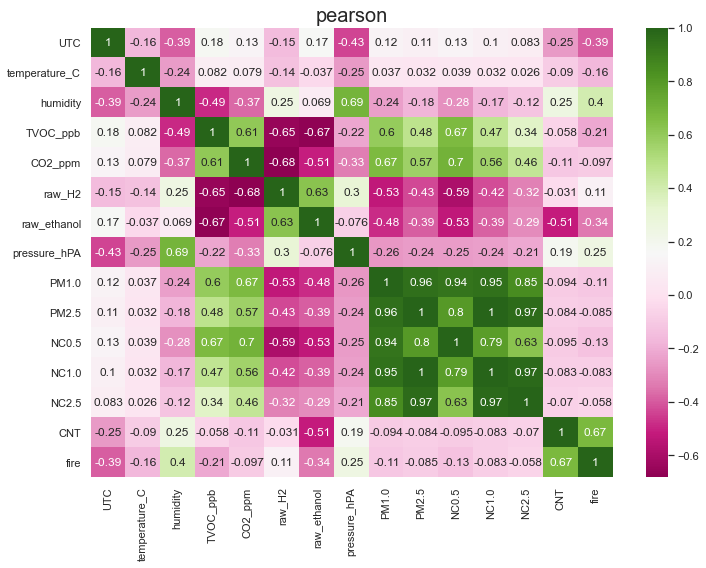

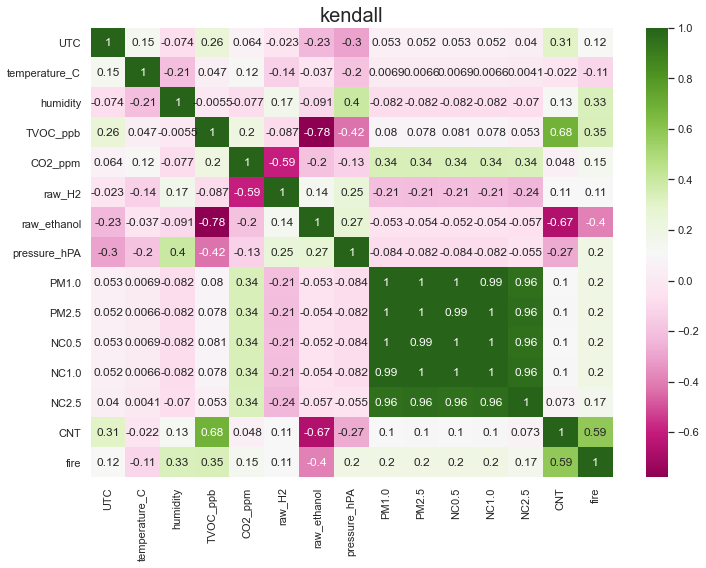

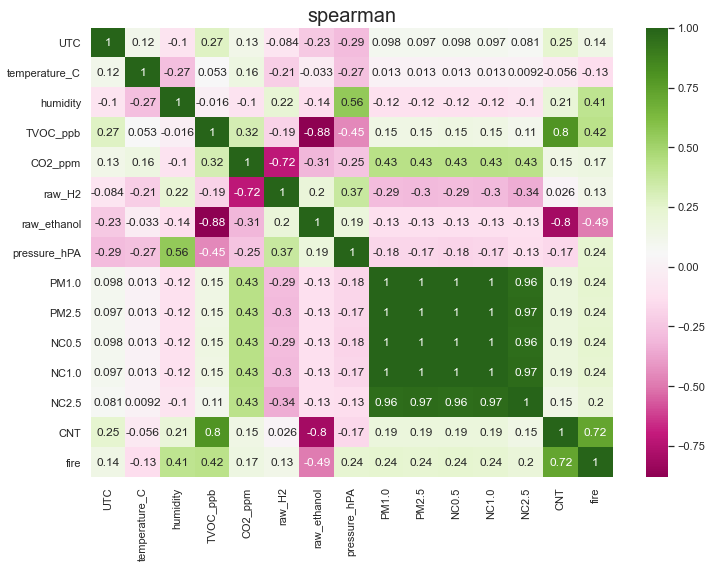

In [49]:
# Correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in ['pearson', 'kendall', 'spearman']:
    plt.figure()
    sns.heatmap(df.corr(method = i), annot = True, cmap="PiYG").set_title(i, fontsize = 20)

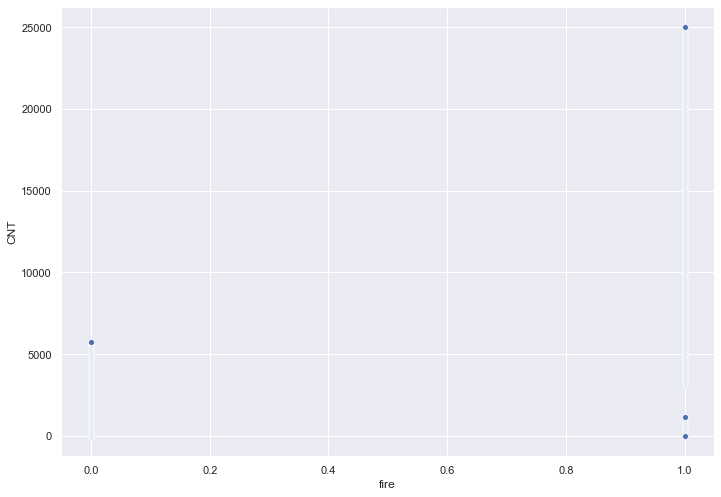

In [50]:
sns.scatterplot(data = df, x = 'fire', y = 'CNT')

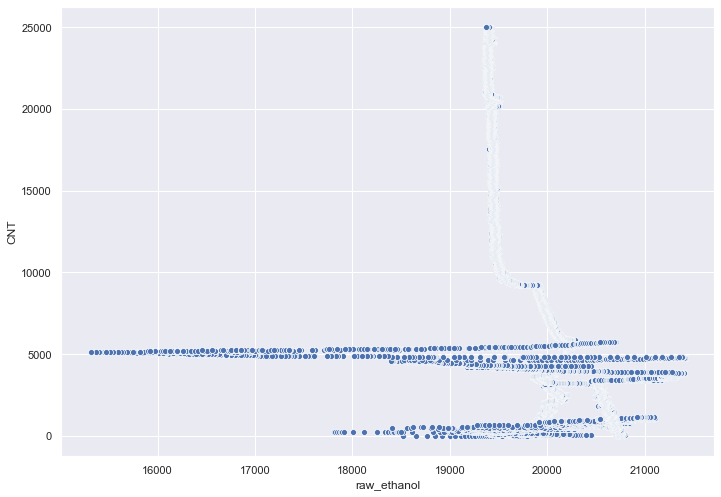

In [51]:
sns.scatterplot(data = df, x = 'raw_ethanol', y = 'CNT')

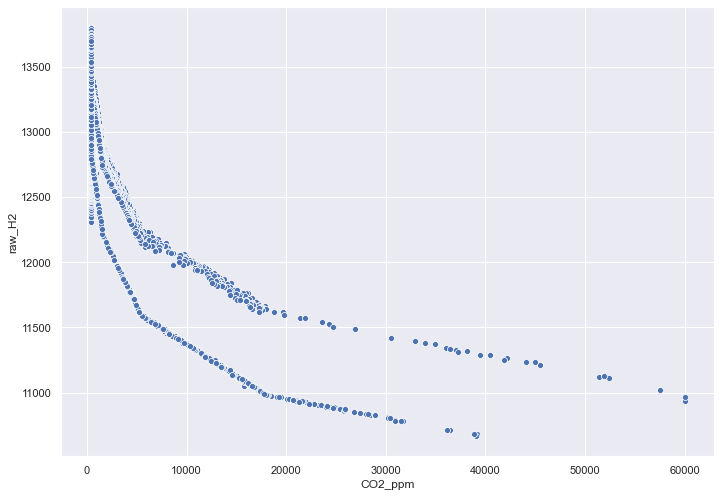

In [52]:
sns.scatterplot(data = df, x = 'CO2_ppm', y = 'raw_H2')

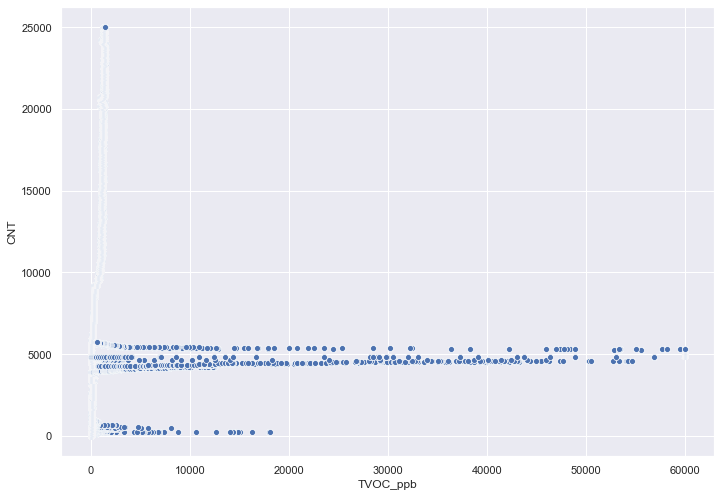

In [53]:
sns.scatterplot(data = df, x = 'TVOC_ppb', y = 'CNT')

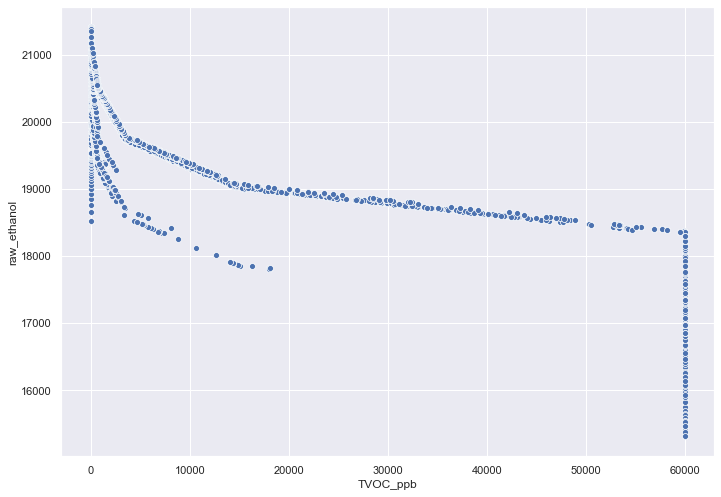

In [54]:
sns.scatterplot(data = df, x = 'TVOC_ppb', y = 'raw_ethanol')

In [55]:
df2 = pd.melt(df[['UTC','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']], 'UTC', var_name='Measure', 
              value_name='Value')
df2.head()

,UTC,Measure,Value
0,1654733331,PM1.0,0.0
1,1654733332,PM1.0,0.0
2,1654733333,PM1.0,0.0
3,1654733334,PM1.0,0.0
4,1654733335,PM1.0,0.0


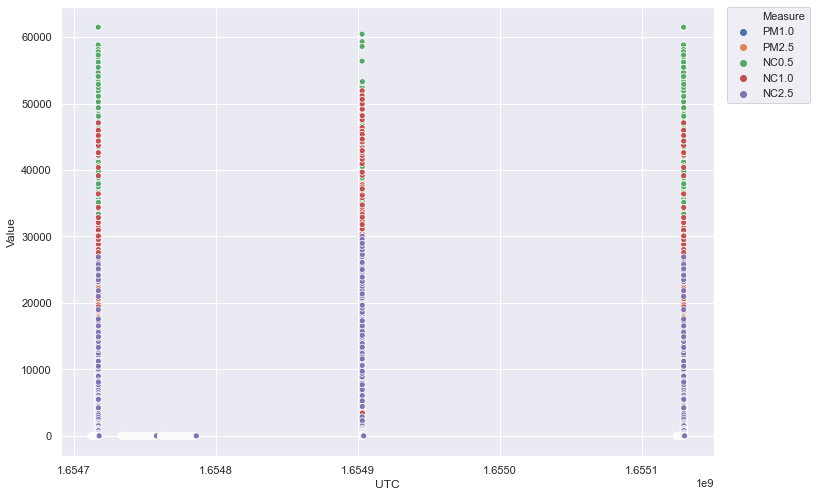

In [56]:
sns.scatterplot(x = 'UTC', y = 'Value', hue='Measure', data=df2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Make a dispersion plot matrix

In [57]:
# Filter data
df['UTC'][df['UTC'] < 1.6548e9]

0        1654733331
1        1654733332
2        1654733333
3        1654733334
4        1654733335
            ...    
56881    1654717926
56882    1654717927
56883    1654717928
56884    1654717929
56885    1654717930
Name: UTC, Length: 55732, dtype: int64

In [58]:
df[['UTC','fire']][df['fire']==1]

,UTC,fire
3178,1654736509,1
3179,1654736510,1
3180,1654736511,1
3181,1654736512,1
3182,1654736513,1
...,...,...
51141,1654904158,1
51145,1654712190,1
51146,1654712191,1
56889,1655124311,1


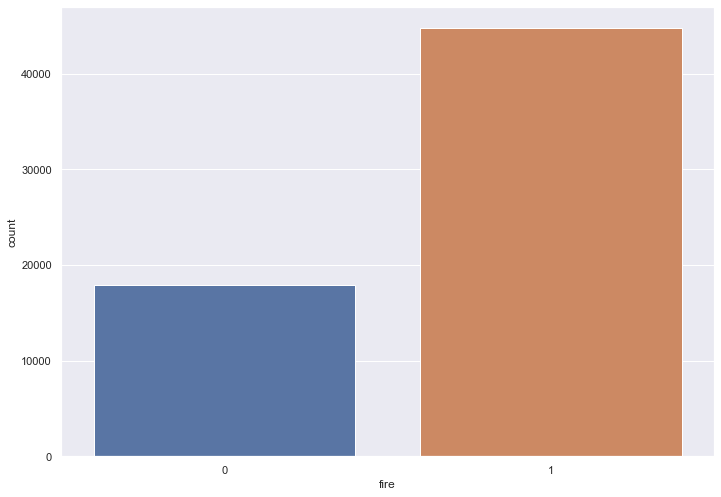

In [59]:
sns.countplot(data = df, x = 'fire')

In [60]:
df.groupby('fire').mean()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
fire,,,,,,,,,,,,,,
0,1.654860e+09,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259,2410.608851
1,1.654765e+09,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627,13746.303439


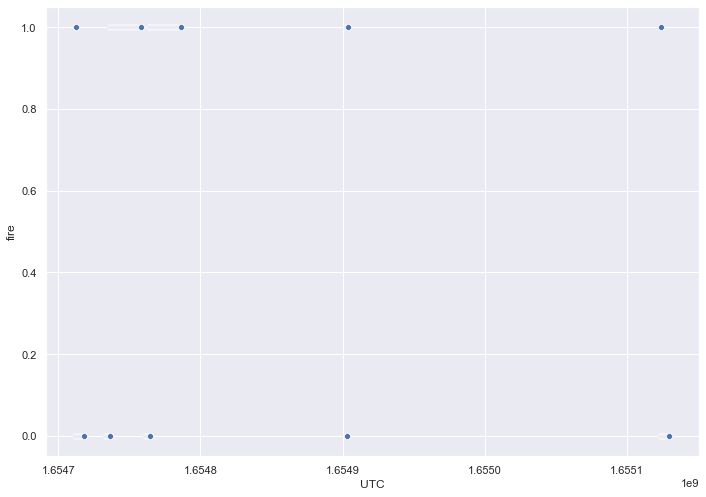

In [61]:
sns.scatterplot(data = df, x = 'UTC', y = 'fire')

# This plot indicates that data collection was probably performed in different days, and thus
# the UTC series is not continuous from beggining to end

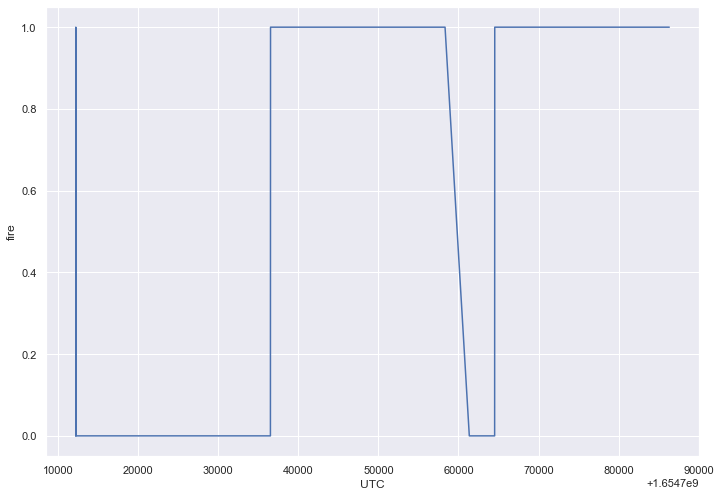

In [62]:
time_window = df[df['UTC'] < 1.6548e9]
sns.lineplot(data = time_window, x = 'UTC', y = 'fire')

In [63]:
# Unix time (also known as Epoch time, Posix time) is the number of seconds that have elapsed since the 
# Unix epoch, 00:00:00 UTC (Coordinated Universal Time) on 1 January 1970.

In [64]:
# We will convert UTC time to datetime to make data more comprehensible 

from datetime import datetime
df['datetime'] = pd.to_datetime(df['UTC'],unit='s')

print(df.head)

<bound method NDFrame.head of               UTC  temperature_C  humidity  TVOC_ppb  CO2_ppm  raw_H2  \
0      1654733331         20.000     57.36         0      400   12306   
1      1654733332         20.015     56.67         0      400   12345   
2      1654733333         20.029     55.96         0      400   12374   
3      1654733334         20.044     55.28         0      400   12390   
4      1654733335         20.059     54.69         0      400   12403   
...           ...            ...       ...       ...      ...     ...   
62625  1655130047         18.438     15.79       625      400   13723   
62626  1655130048         18.653     15.87       612      400   13731   
62627  1655130049         18.867     15.84       627      400   13725   
62628  1655130050         19.083     16.04       638      400   13712   
62629  1655130051         19.299     16.52       643      400   13696   

       raw_ethanol  pressure_hPA  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5   CNT  \
0            185

In [65]:
df['day'] = pd.to_datetime(df['UTC'],unit='s').dt.day
df['time'] = pd.to_datetime(df['UTC'],unit='s').dt.hour
print(df['time'])

0         0
1         0
2         0
3         0
4         0
         ..
62625    14
62626    14
62627    14
62628    14
62629    14
Name: time, Length: 62630, dtype: int64


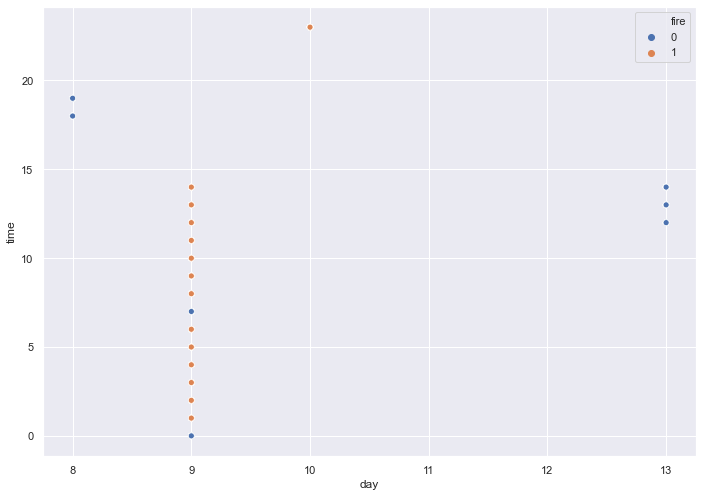

In [66]:
sns.scatterplot(data = df, x = 'day', y = 'time', hue='fire')

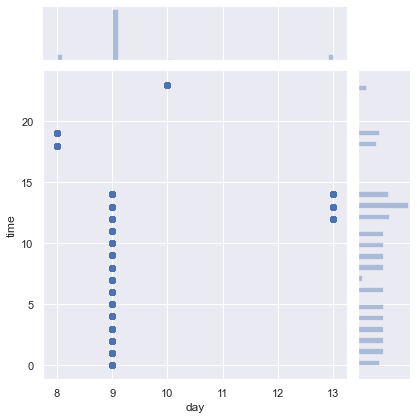

In [67]:
sns.jointplot(data = df, x = 'day', y = 'time')

In [68]:
df['time']

0         0
1         0
2         0
3         0
4         0
         ..
62625    14
62626    14
62627    14
62628    14
62629    14
Name: time, Length: 62630, dtype: int64

In [69]:
df.groupby(['day','time']).mean()

UTC  temperature_C   humidity      TVOC_ppb      CO2_ppm  \
day time                                                                      
8   18    1.654713e+09      27.625473  43.949005     94.918102   412.659013   
    19    1.654716e+09      38.921999  33.255430  12999.002555  1981.949537   
9   0     1.654735e+09      22.320940  51.752760     36.133594   400.872597   
    1     1.654738e+09      -3.988094  52.249072    119.336667   400.000000   
    2     1.654742e+09      -4.504414  54.513458    428.587778   495.015556   
    3     1.654745e+09      14.003174  50.574719   1056.562222   592.534722   
    4     1.654749e+09      13.897088  50.313992   1138.905278   432.767222   
    5     1.654753e+09      16.404848  50.507506   1192.332778   405.618611   
    6     1.654756e+09     -13.155352  50.803953   1338.445833   406.406389   
    7     1.654760e+09      12.093247  51.746168    742.469072   411.847079   
    8     1.654763e+09      17.639850  52.344689     79.678611   400.000000   
    9     1.654767e+09      20.659322  51.826942    121.618333   400.000000   
    10    1.654771e+09      21.602658  54.301778    586.586111   554.238889   
    11    1.654774e+09      25.703603  50.180353   1092.771667   551.057222   
    12    1.654778e+09      25.790847  50.397628   1144.190278   416.036389   
    13    1.654781e+09      25.736847  50.546706   1232.879167   406.011667   
    14    1.654785e+09      25.662251  50.845104   1337.831049   407.080332   
10  23    1.654904e+09      34.233224  23.258588    589.825823  4327.589255   
13  12    1.655125e+09      18.853584  42.862231     59.343049   418.086323   
    13    1.655127e+09       6.725675  43.940850   1304.643611   418.587222   
    14    1.655129e+09      -4.510023  18.004257  28912.337859  4316.226038   

                raw_H2   raw_ethanol  pressure_hPA        PM1.0        PM2.5  \
day time                                                                       
8   18    12797.044776  20646.237275    937.455305     1.967107     2.043739   
    19    12847.517407  19748.136698    937.056948   745.291460  1281.883286   
9   0     13022.145976  19949.256435    939.698948     0.572164     0.618306   
    1     13211.277222  20113.553611    939.669329     1.884614     1.957989   
    2     13008.023056  19849.003333    939.342383     1.020975     1.060775   
    3     12817.462500  19466.141944    939.003912     2.094425     2.176058   
    4     12875.536667  19444.948333    938.817022     1.828808     1.900108   
    5     12928.893611  19430.884167    938.714431     1.769283     1.838136   
    6     12972.508889  19393.394444    938.729488     1.911550     1.985944   
    7     12794.824742  19486.938144    939.256564     1.111856     1.264175   
    8     13087.323611  19982.871389    939.686356     0.861461     0.897733   
    9     13204.476111  20122.062778    939.644466     1.616794     1.679706   
    10    12932.380556  19731.466667    939.238838     1.404108     1.458889   
    11    12831.992500  19456.870556    938.965336     2.017222     2.095794   
    12    12886.548333  19443.633611    938.774683     1.781931     1.851436   
    13    12939.838889  19420.358056    938.713097     1.822028     1.892931   
    14    12978.226650  19393.509723    938.746197     1.901310     1.975336   
10  23    12674.684575  20075.666378    930.979036  1336.664957  2973.733943   
13  12    12823.967489  20711.589686    937.547978     2.098868     2.180460   
    13    12890.514444  20516.020833    937.320572     1.669000     1.734072   
    14    12635.322684  18728.131789    936.780481  1861.635000  3203.457851   

                NC0.5        NC1.0        NC2.5           CNT      fire  
day time                                                                 
8   18      13.539150     2.111258     0.047682   1306.000000  0.000765  
    19    3854.299134  1406.909743   510.742916   4178.000000  0.000000  
9   0        3.881662     0.642599     0.036954   1534.000000  0

In [70]:
df.groupby('day').mean()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire,time
day,,,,,,,,,,,,,,,,
8,1.654715e+09,33.783102,38.120038,7128.812326,1268.064415,12824.556929,20156.691156,937.238165,407.146172,699.672155,2107.101043,767.853607,278.422817,2871.5,0.000348,18.545091
9,1.654760e+09,14.629292,51.517673,781.279667,448.144675,12975.730055,19654.352765,939.123546,1.608686,1.674277,11.064991,1.730035,0.041832,12496.5,0.872849,7.009522
10,1.654904e+09,34.233224,23.258588,589.825823,4327.589255,12674.684575,20075.666378,930.979036,1336.664957,2973.733943,5217.393596,3330.189343,1570.935114,576.5,0.971404,23.000000
13,1.655127e+09,6.160041,38.120038,7128.812326,1268.064415,12824.556929,20156.691156,937.238165,407.146172,699.672155,2107.101043,767.853607,278.422817,2871.5,0.000348,13.062674


In [71]:
# It is difficult to plot any measure over time, because there were different scenarios of fire in different days
# and hours. It would be necessary to separate each situation in order to observe the measure second by second.

# The fire simulations happened for a short period of time, however in distinct moments. Thus, when we plot any
# measure over time, the points are concentrated and it is hard to observe any patterns or tendencies.

# Use histograms

## Feature extraction

- PM x NC: highly correlated, and we are not sure what the PM attribute is. Maybe discad these ones.
- The hour of the day is probably an important feature to predict fire, however, since the data set we are using was created artificially, this variable may not reflect real life.

In [72]:
# Models: logistic regression and decision tree

# Logistic regression aims to solve classification problems. It does this by predicting categorical 
# outcomes, unlike linear regression that predicts a continuous outcome. (W3Schools)

# Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.

# Recursive Feature Elimination (RFE)?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# When to use normalization/standardization? When the model "mix" variables.

In [73]:
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire,datetime,day,time
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09 00:08:51,9,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09 00:08:52,9,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09 00:08:53,9,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09 00:08:54,9,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09 00:08:55,9,0


In [74]:
from sklearn.model_selection import train_test_split

# Remove columns
cols_to_remove = ['UTC', 'datetime', 'day', 'time']
df_vars = df.drop(cols_to_remove, axis = 1)

# Separate attributes and target
X = df_vars.loc[:, df_vars.columns != 'fire']
y = df_vars.loc[:, df_vars.columns == 'fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Cols with a correlation coefficient higher than 0.95

import numpy as np

limit = 0.95
corr = df_vars.corr()
mask = np.triu(
    np.ones(corr.shape), k=1
).astype(bool)
corr_no_diag = corr.where(mask)
coll = [
    c
    for c in corr_no_diag.columns
    if any(abs(corr_no_diag[c]) > limit)
]
coll

['PM2.5', 'NC1.0', 'NC2.5']

/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

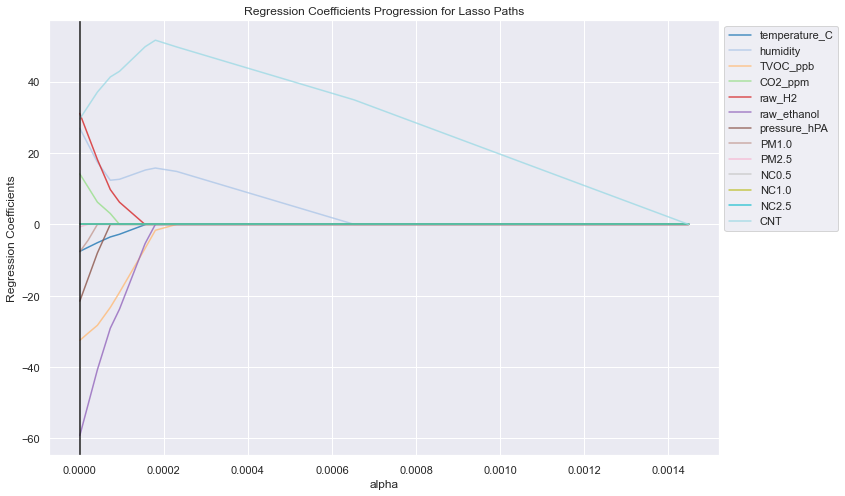

In [76]:
from sklearn import linear_model
model = linear_model.LassoLarsCV(
    cv=10, max_n_alphas=10
).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12, 8))
cm = iter(
    plt.get_cmap("tab20")(
        np.linspace(0, 1, X.shape[1])
    )
)
for i in range(X.shape[1]):
    c = next(cm)
    ax.plot(
        model.alphas_,
        model.coef_path_.T[:, i],
        c=c,
        alpha=0.8,
        label=X.columns[i],
    )
ax.axvline(
    model.alpha_,
    linestyle="-",
    c="k",
    label="alphaCV",
)
plt.ylabel("Regression Coefficients")
ax.legend(X.columns, bbox_to_anchor=(1, 1))
plt.xlabel("alpha")
plt.title(
    "Regression Coefficients Progression for Lasso Paths"
)

## Train 1st model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

logreg = LogisticRegression()

# Train model
logreg.fit(X_train, y_train.values.ravel())
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)

# Predict new data
predictions = logreg.predict(X_test)

# Quick evaluation of the model
score = logreg.score(X_test, y_test.values.ravel())
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test.values.ravel(), predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9754643674490393
ROC-AUC: 0.9761249745425937
            Predict Fire  Predict Not Fire
True Fire           5302               121
False Fire           340             13026


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# Reducing the number of attributes

X_train2 = X_train.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)
X_test2 = X_test.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)

logreg = LogisticRegression()
logreg.fit(X_train2, y_train.values.ravel())
predictions = logreg.predict(X_test2)

score = logreg.score(X_test2, y_test.values.ravel())
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test.values.ravel(), predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

# Removing the columns 'PM1.0', 'PM2.5', 'NC1.0', and 'NC0.5' enhanced the model

Accuracy: 0.9878120176699132
ROC-AUC: 0.9904472402378142
            Predict Fire  Predict Not Fire
True Fire           5405                18
False Fire           211             13155


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature standardization/normalization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

(Include formulas)

Source: https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [81]:
from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train2, norm='l2')
X_test_normalized = preprocessing.normalize(X_test2, norm='l2')

logreg = LogisticRegression()
logreg.fit(X_normalized, y_train.values.ravel())
predictions = logreg.predict(X_test_normalized)

score = logreg.score(X_test_normalized, y_test.values.ravel())
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test.values.ravel(), predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

# Normalization worsened the model

Accuracy: 0.9555591037309064
ROC-AUC: 0.9550113516371337
            Predict Fire  Predict Not Fire
True Fire           5172               251
False Fire           584             12782


In [82]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train2)
X_scaled = scaler.transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

logreg = LogisticRegression()
logreg.fit(X_scaled, y_train.values.ravel())
predictions = logreg.predict(X_test_scaled)

score = logreg.score(X_test_scaled, y_test.values.ravel())
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test.values.ravel(), predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

# Accuracy increased, however ROC-AUC decreased. We will proceed without standardization

Accuracy: 0.9908989302251318
ROC-AUC: 0.9882336013260228
            Predict Fire  Predict Not Fire
True Fire           5325                98
False Fire            73             13293


## Evaluating 1st model

**Accuracy:** (TP + TN) / (TP + TN + FP + FN)

Accuracy is used to calculate the proportion of the total number of predictions that were correct. While being intuitive, the accuracy metric heavily relies on data specifics. If the dataset is imbalanced (the classes in a set are presented unevenly), the result won’t be something you can trust.

**Recall / Sensitivity / True Positive Rate:** TP / (TP + FN)

Recall is the probability that an actual positive will test positive. It is used in a case where it is critical to not miss the positives, even if it means increasing the number of false positives. For example: classification of sick versus healthy patients.

**Specificity / False Positive Rate:** TN / (TN + FP)

The fraction of all negative instances *incorrectly identified as positive*. Specificity is basically the opposite of recall.

**Precision:** TP / (TP + FP)

The fraction of positive predictions that are correct. Precision does well in cases when it is more important to *avoid False Positves* than False Negatives. A typical example of this is a spam detector model. It’s kind of okay if the model sends a couple of spam letters to the inbox, but sending an important non-spam email to the spam folder (False Positive) is much worse.

**F1 Score:** 2TP / (2TP + FP + FN)

The F1 Score tries to find the balance between precision and recall by calculating their harmonic mean. It is a measure of a test’s accuracy where the highest possible value is 1. This indicates perfect precision and recall.

**AUC-ROC:** The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’. When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.

Sources: 
- https://www.altexsoft.com/blog/machine-learning-metrics/
- https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

In [106]:
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

accuracy_lr = logreg.score(X_test_scaled, y_test.values.ravel())
print('Accuracy:',accuracy_lr)

recall_lr = recall_score(y_test.values.ravel(), predictions)
print('Recall:',recall_lr)

f1_lr = f1_score(y_test.values.ravel(), predictions)
print('F1:',f1_lr)

precision_lr = precision_score(y_test.values.ravel(), predictions)
print('Precision:',precision_lr)

roc_auc_lr = roc_auc_score(y_test.values.ravel(), predictions)
print('ROC-AUC:',roc_auc_lr)

Accuracy: 0.9908989302251318
Recall: 0.9945383809666317
F1: 0.9936091490077363
Precision: 0.992681651855724
ROC-AUC: 0.9882336013260228


Text(0.5, 1.0, 'ROC curve')

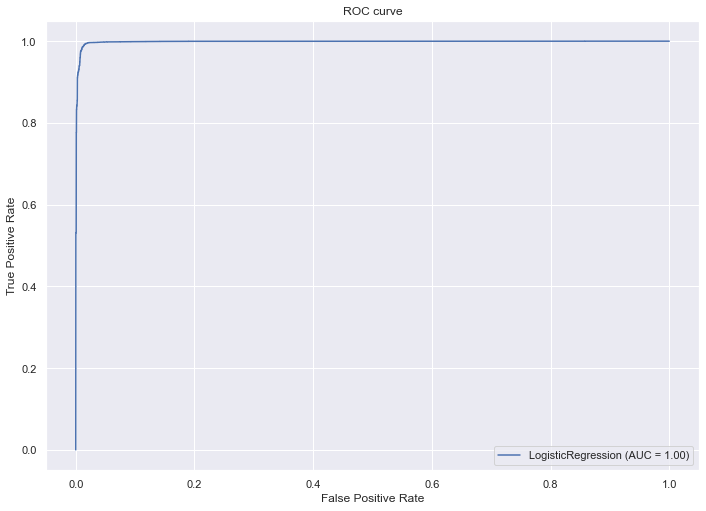

In [86]:
metrics.plot_roc_curve(logreg, X_test_scaled, y_test.values.ravel())
plt.title("ROC curve")

## Train 2nd model

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [103]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X_train2, y_train)
pred = clf.predict(X_test2)

[Text(871.875, 951.3000000000001, 'CNT <= 5743.5\ngini = 0.407\nsamples = 43841\nvalue = [12450, 31391]\nclass = 1'),
 Text(697.5, 679.5, 'raw_H2 <= 13204.5\ngini = 0.386\nsamples = 16862\nvalue = [12450, 4412]\nclass = 0'),
 Text(348.75, 407.70000000000005, 'pressure_hPA <= 933.979\ngini = 0.211\nsamples = 12042\nvalue = [10600, 1442]\nclass = 0'),
 Text(174.375, 135.89999999999998, 'gini = 0.039\nsamples = 709\nvalue = [14, 695]\nclass = 1'),
 Text(523.125, 135.89999999999998, 'gini = 0.123\nsamples = 11333\nvalue = [10586, 747]\nclass = 0'),
 Text(1046.25, 407.70000000000005, 'pressure_hPA <= 939.618\ngini = 0.473\nsamples = 4820\nvalue = [1850, 2970]\nclass = 1'),
 Text(871.875, 135.89999999999998, 'gini = 0.155\nsamples = 1895\nvalue = [1734, 161]\nclass = 0'),
 Text(1220.625, 135.89999999999998, 'gini = 0.076\nsamples = 2925\nvalue = [116, 2809]\nclass = 1'),
 Text(1046.25, 679.5, 'gini = 0.0\nsamples = 26979\nvalue = [0, 26979]\nclass = 1')]

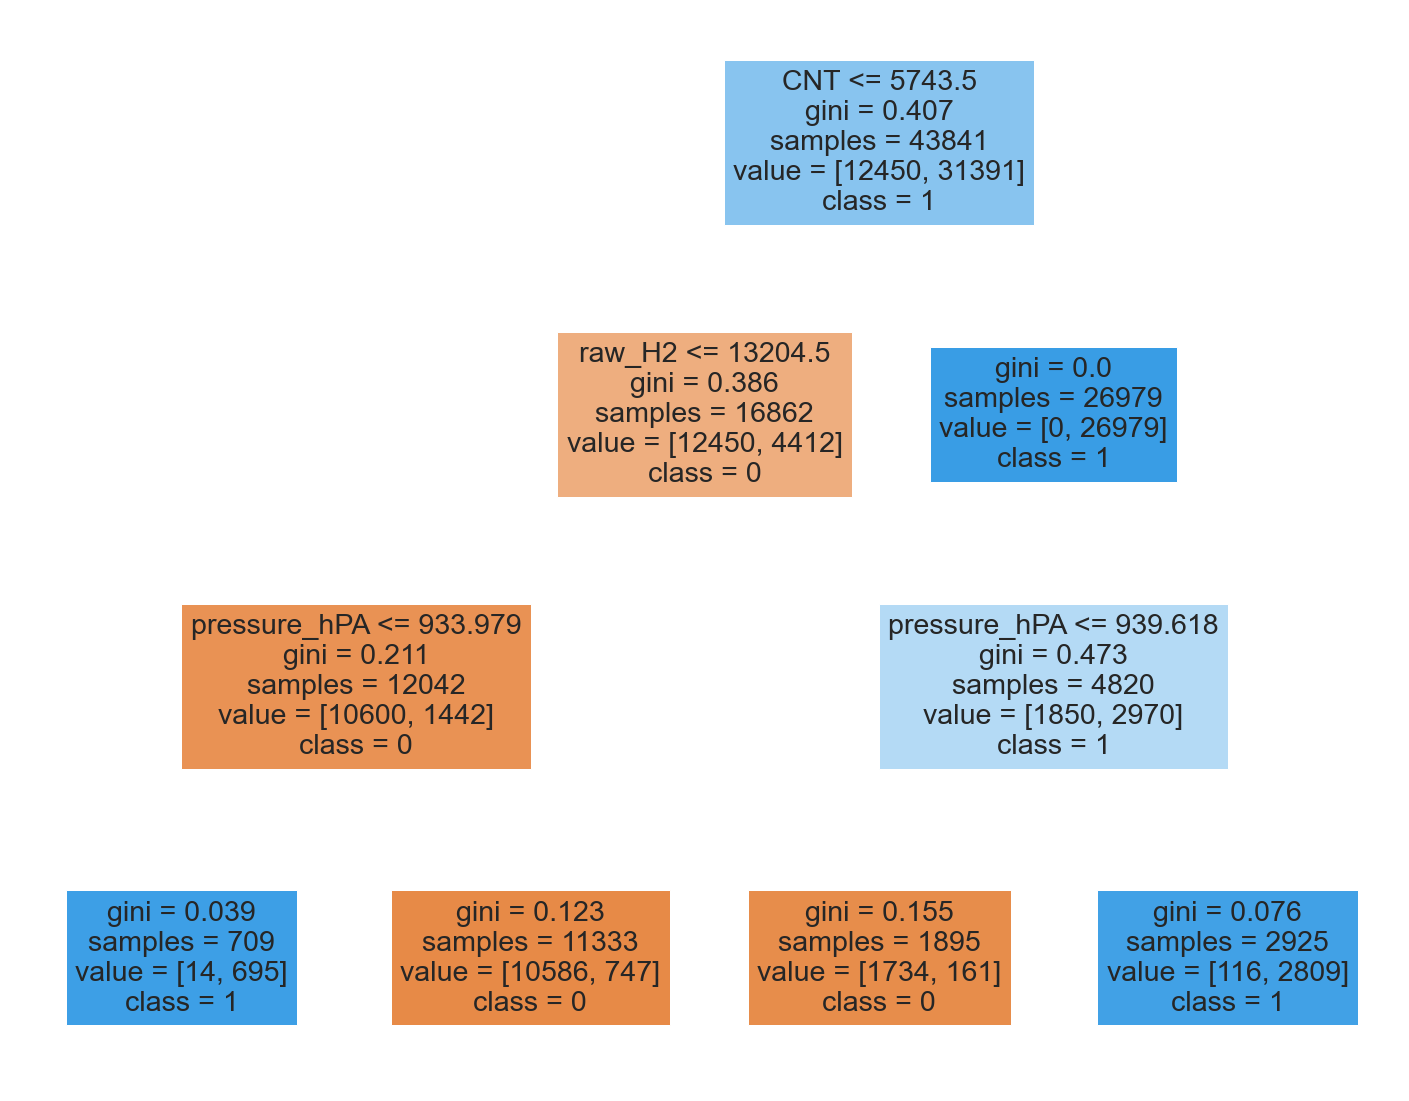

In [104]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=X_train2.columns,  
               class_names=['0','1'],
               filled=True)

In [108]:
accuracy_dt = clf.score(X_test2, y_test.values.ravel())
print('Accuracy:',accuracy_dt)

recall_dt = recall_score(y_test.values.ravel(), pred)
print('Recall:',recall_dt)

f1_dt = f1_score(y_test.values.ravel(), pred)
print('F1:',f1_dt)

precision_dt = precision_score(y_test.values.ravel(), pred)
print('Precision:',precision_dt)

roc_auc_dt = roc_auc_score(y_test.values.ravel(), pred)
print('ROC-AUC:',roc_auc_dt)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9756240353398264
Recall: 0.9708963040550651
F1: 0.9826593972436772
Precision: 0.9947110225356431
ROC-AUC: 0.9790863596616833
            Predict Fire  Predict Not Fire
True Fire           5325                98
False Fire            73             13293


# References
 
1.10.Decision Trees. SciKit-learn documentation. [Link](https://scikit-learn.org/stable/modules/tree.html)

https://www.datacamp.com/tutorial/decision-tree-classification-python